In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
con = sqlite3.connect('Data/amiunique-1month-aug17.sqlite3')

df = pd.read_sql_query('select * from fpData', con)
#df = pd.read_csv("amiunique-1month-aug17.csv")

In [3]:
# Look at the shape of the data
print(f"DF's Shape: {df.shape}")

DF's Shape: (26110, 35)


In [4]:
# Check to see if there are any missing values in the data
# Also, show an overview of the colums
df.isnull().any()

counter             False
id                  False
addressHttp         False
time                False
userAgentHttp       False
acceptHttp          False
hostHttp            False
connectionHttp      False
encodingHttp        False
languageHttp        False
orderHttp           False
pluginsJS           False
platformJS          False
cookiesJS           False
dntJS               False
timezoneJS          False
resolutionJS        False
localJS             False
sessionJS           False
IEDataJS            False
canvasJS            False
webGLJs             False
fontsFlash          False
resolutionFlash     False
languageFlash       False
platformFlash       False
adBlock             False
vendorWebGLJS       False
rendererWebGLJS     False
octaneScore         False
sunspiderTime       False
pluginsJSHashed     False
canvasJSHashed      False
webGLJsHashed       False
fontsFlashHashed    False
dtype: bool

In [5]:
# Overview of the data we're working with
# Maybe we should convert "not specified" and "not supported" to null values?
df.head()

,counter,id,addressHttp,time,userAgentHttp,acceptHttp,hostHttp,connectionHttp,encodingHttp,languageHttp,...,platformFlash,adBlock,vendorWebGLJS,rendererWebGLJS,octaneScore,sunspiderTime,pluginsJSHashed,canvasJSHashed,webGLJsHashed,fontsFlashHashed
0,426801,Not supported,55d1fdecf97155f039d7ebdf163d713744cce141,2017-08-04 10:00:00,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) ...,Not specified,amiunique-backend,close,Not specified,Not specified,...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS
1,426802,318f6028-9fa0-4109-b693-ed12a5afca59,d7620ba0d1c08ec6359fcd8275fa32efb0b4d17b,2017-08-04 10:00:00,Mozilla/5.0 (Android 6.0.1; Mobile; rv:54.0) G...,"text/html,application/xhtml+xml,application/xm...",amiunique-backend,close,"gzip, deflate, br","de,de-DE;q=0.8,en-US;q=0.5,en;q=0.3",...,Flash not detected,no,ARM,Mali-400 MP,,,da39a3ee5e6b4b0d3255bfef95601890afd80709,d09b49abeb7bda6590206b65aa3f270181674d32,d1271016edb3b86ab21db854f6476944f643878f,ce30cd74ffc46157d73983a8599d5ed2d2564260
2,426803,Not supported,f4d7978e4bf9a3180a96d6c7824c53cc13dd4d44,2017-08-04 10:00:00,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"text/html,application/xhtml+xml,application/xm...",amiunique-backend,close,"gzip, deflate, br","en-US,en;q=0.8,de;q=0.6,de-DE;q=0.4",...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS
3,426804,Not supported,ff3f9bf2797061dad81147e219e1bbda65e29df2,2017-08-04 10:00:00,Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US...,Not specified,amiunique-backend,close,Not specified,Not specified,...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS
4,426805,Not supported,ae2faaf7e9e248db79a0e28f28b434b0db29e2af,2017-08-04 10:00:00,Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US...,Not specified,amiunique-backend,close,Not specified,Not specified,...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS


In [6]:
# All the types returned (except for "counter") were "object"

#df.dtypes

In [7]:
# Functions that takes a column name in a DF and plots its histogram or KDE 
# if it's not categorical

def histogram_creator(variable_name):
    try:
        sns.countplot(data=df, x=variable_name)
        plt.title(f"Frequency of {variable_name} "
                  f"({'unique' if df[variable_name].is_unique else 'not unique'})",
                  fontsize = 15)
        plt.ylabel("Count", fontsize = 12)
        plt.xlabel(variable_name, fontsize = 12)
        plt.show()
    except:
        print(f"Error Plotting \"{variable_name}\"")
    
def kde_creator(variable_name):
    try:
        df[variable_name].value_counts().plot(kind = 'kde')
        plt.title(f"Frequency of {variable_name} "
                  f"({'unique' if df[variable_name].is_unique else 'not unique'})",
                  fontsize = 15)
        plt.ylabel("Count", fontsize = 12)
        plt.xlabel(variable_name, fontsize = 12)
        plt.show()
    except:
        print(f"Error Plotting \"{variable_name}\"")

In [ ]:
# Place-holder for list creator of colums -- decide whether to histogram or kde plot

list_of_df_columns = list(df.columns.values)

list_of_df_columns.remove('counter')

#list_of_df_columns_to_kde = list_of_columns.copy()
#list_of_df_columns_to_kde.remove()

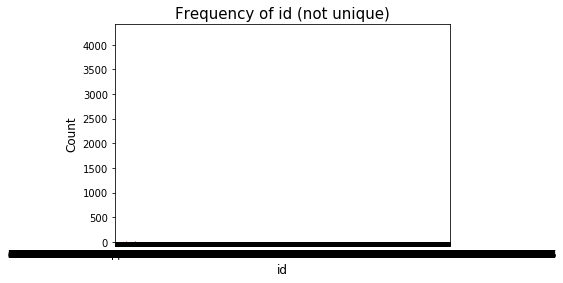

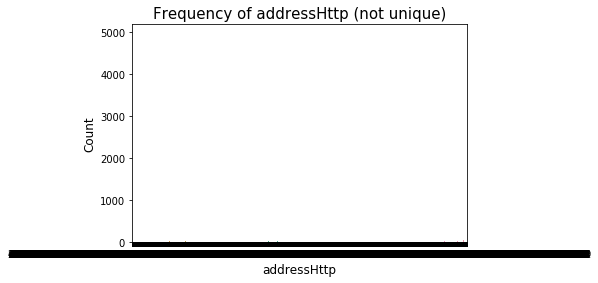

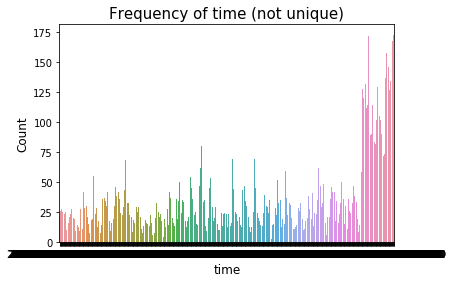

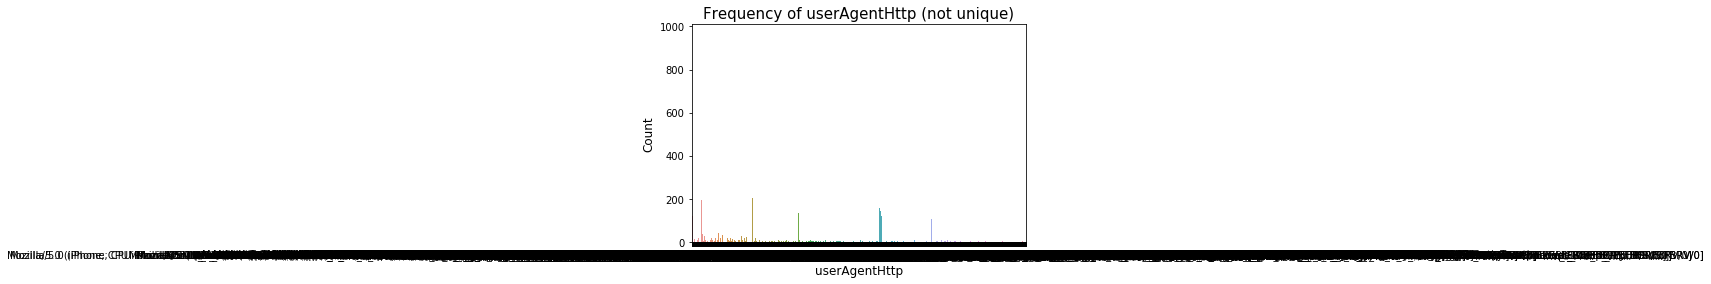

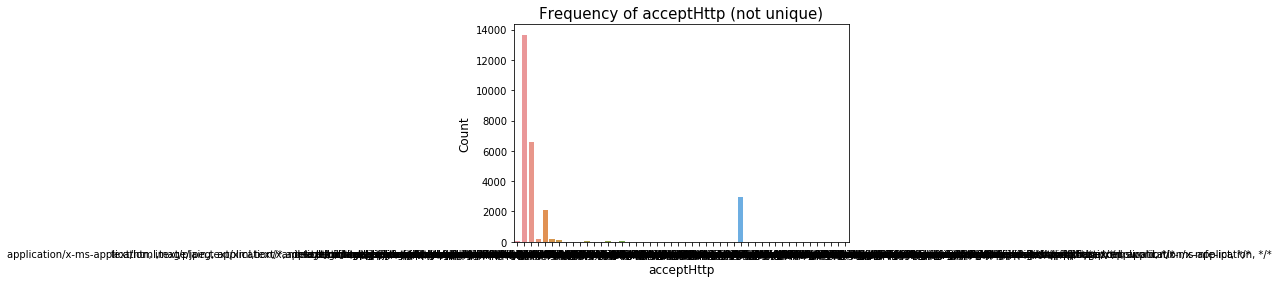

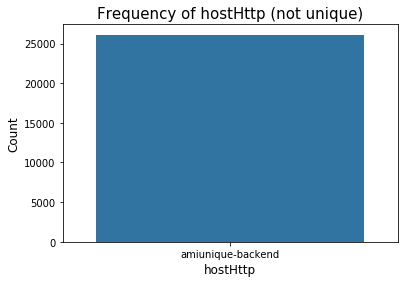

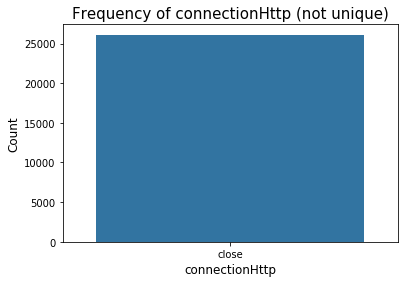

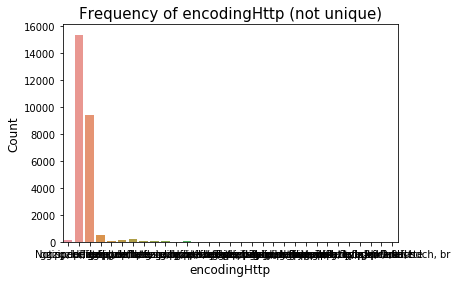

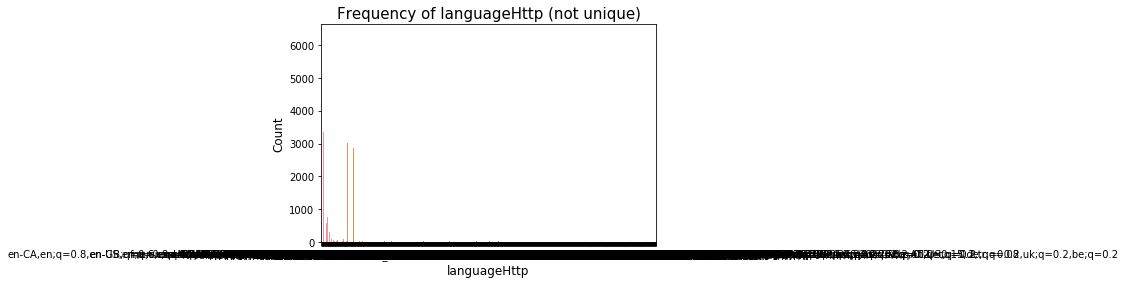

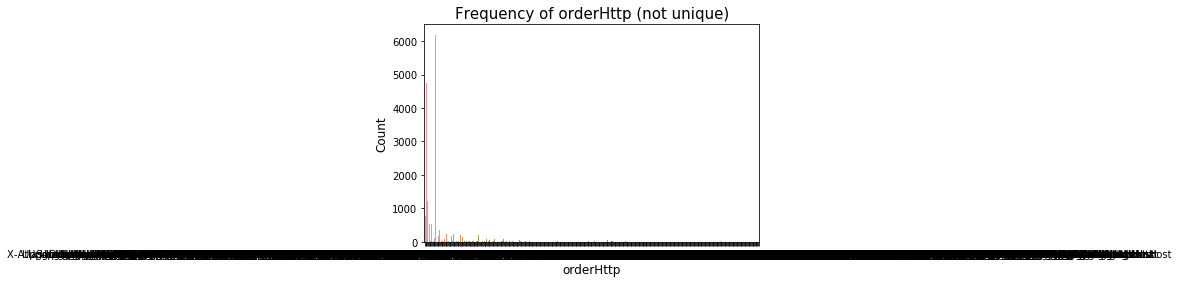

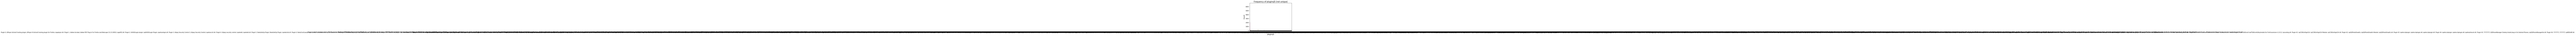

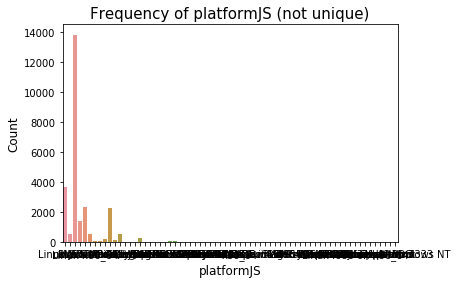

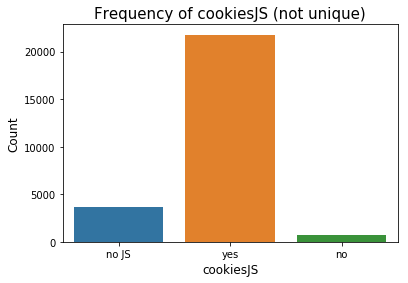

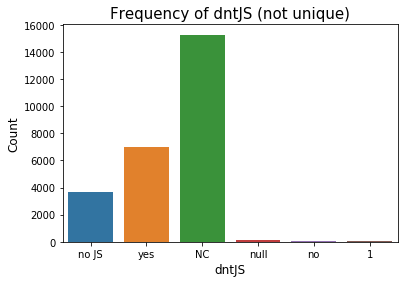

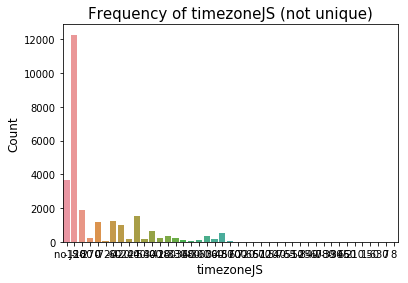

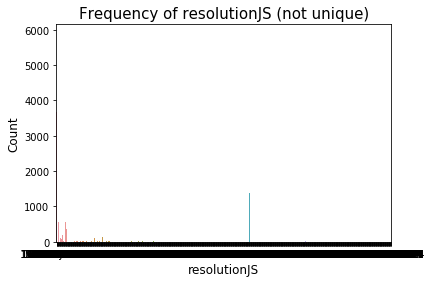

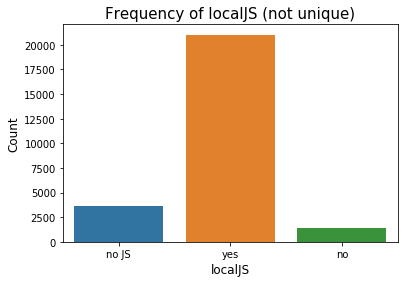

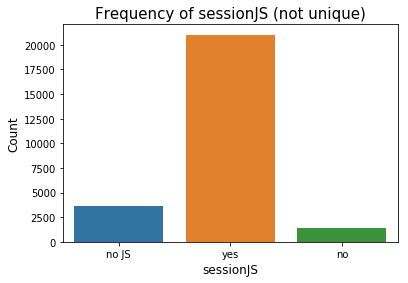

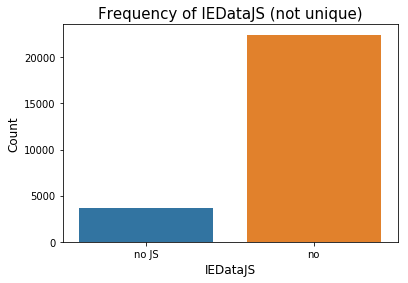

In [ ]:
columns_to_histogram = ['adBlock', 'hostHttp']

[histogram_creator(x) for x in list_of_df_columns]

#histogram_creator(histograms_to_create, lambda x: x)
#map(histogram_creator, colums_to_histogram)

In [ ]:
list_of_df_columns = ['adBlock', 'platformJS']

[kde_creator(x) for x in list_of_df_columns]

In [ ]:
"""
TO DO:
Split the following out from histograms and create KDEs (the opposite is true for KDEs)
or someother viz type:
* ID - why is it not unique
* addressHttp - why is it not unique; explore the coincident values
* time - look into panda's approach for better displaying time
* userAgentHttp - look into silva's approach of breaking it down into sub-parts
* acceptHttp -- look into the big 4 counts
* languageHttp
* orderHttp
* resulutionJS

"""